In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
     


In [2]:
dt=pd.read_csv("C:\\Users\\jaink\\Downloads\\Dataset .csv")
     

In [3]:
dt.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
dt.shape


(9551, 21)

In [5]:
dt.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
dt.describe()


,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [7]:
dt["Aggregate rating"].isnull().sum()


0

In [8]:
l=LabelEncoder()


In [9]:
dt['Cuisines']=l.fit_transform(dt['Cuisines'])
dt['Restaurant Name']=l.fit_transform(dt['Restaurant Name'])
dt['Has Online delivery']=l.fit_transform(dt['Has Online delivery'])
dt['Has Table booking']=l.fit_transform(dt['Has Table booking'])
dt['Is delivering now']=l.fit_transform(dt['Is delivering now'])
dt['Currency']=l.fit_transform(dt['Currency'])
dt['Switch to order menu']=l.fit_transform(dt['Switch to order menu'])
dt['Rating text']=l.fit_transform(dt['Rating text'])


In [10]:
X=dt.drop(columns=['City',"Address",'Locality','Locality Verbose','Aggregate rating','Rating color'],axis=1)
Y=dt['Aggregate rating']
     


In [11]:
X

,Restaurant ID,Restaurant Name,Country Code,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Rating text,Votes
0,6317637,3748,162,121.027535,14.565443,920,1100,0,1,0,0,0,3,1,314
1,6304287,3172,162,121.014101,14.553708,1111,1200,0,1,0,0,0,3,1,591
2,6300002,2896,162,121.056831,14.581404,1671,4000,0,1,0,0,0,4,5,270
3,6318506,4707,162,121.056475,14.585318,1126,1500,0,0,0,0,0,4,1,365
4,6314302,5523,162,121.057508,14.584450,1122,1500,0,1,0,0,0,4,1,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,4443,208,28.977392,41.022793,1813,80,11,0,0,0,0,3,5,788
9547,5908749,1310,208,29.041297,41.009847,1824,105,11,0,0,0,0,3,5,1034
9548,5915807,3068,208,29.034640,41.055817,1110,170,11,0,0,0,0,4,2,661
9549,5916112,512,208,29.036019,41.057979,1657,120,11,0,0,0,0,4,5,901


In [12]:
Y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [13]:
Y.value_counts()


Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=3)
     

In [15]:
x_train.shape,x_test.shape


((7640, 15), (1911, 15))

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit_transform(x_train)
     

array([[-0.99813243, -0.11147795, -0.31010584, ...,  1.32011437,
        -1.05518051,  0.23255851],
       [-1.03153911,  1.19081687, -0.31010584, ..., -0.89092888,
        -1.05518051, -0.3160629 ],
       [ 1.06347997, -0.88162736, -0.31010584, ..., -0.89092888,
         0.71568698, -0.36406727],
       ...,
       [-0.29240162,  1.41583041, -0.31010584, ...,  1.32011437,
         1.8962653 ,  2.24874219],
       [ 1.06829288,  1.18385769, -0.31010584, ..., -0.89092888,
         0.71568698, -0.36406727],
       [-0.99743926,  1.30773112, -0.31010584, ..., -0.89092888,
         0.12539782, -0.28405999]])

In [17]:
x_train_scaled = sc.fit_transform(x_test)
     

In [18]:
m=LinearRegression()
     

In [19]:
m.fit(x_train,y_train)


LinearRegression()

In [20]:
m.score(x_test,y_test)

0.4481860785429983

In [21]:
d=DecisionTreeRegressor()

In [22]:
d.fit(x_train,y_train)

DecisionTreeRegressor()

In [23]:
d.score(x_test,y_test)

0.976659537600692

In [24]:
y_pred = m.predict(x_test)
mse = mean_squared_error(y_test,y_pred)
print("MSE",mse)

MSE 1.263006873383533


In [25]:
r2 = r2_score(y_test, y_pred)
print("r2_score ", r2)

r2_score  0.4481860785429983


In [26]:
y_pred1 = d.predict(x_test)
mse1 = mean_squared_error(y_test,y_pred1)
r21 = r2_score(y_test, y_pred1)
print("MSE ",mse1)
print("r2_score ", r21)
     


MSE  0.053422291993720554
r2_score  0.976659537600692


In [27]:
if hasattr(m, 'coef_'):
    coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': m.coef_})
    print("Linear Regression Coefficients:")
    print(coefficients)
     

Linear Regression Coefficients:
                 Feature   Coefficient
0          Restaurant ID -3.845708e-08
1        Restaurant Name -2.075571e-07
2           Country Code  8.297456e-03
3              Longitude  1.232806e-03
4               Latitude -2.931787e-03
5               Cuisines -2.028759e-04
6   Average Cost for two  1.214144e-06
7               Currency -8.100700e-02
8      Has Table booking  4.141378e-03
9    Has Online delivery  6.707731e-01
10     Is delivering now -6.882375e-02
11  Switch to order menu  5.551115e-17
12           Price range  5.268369e-01
13           Rating text -2.395808e-01
14                 Votes  5.971713e-04


In [28]:
if hasattr(d, 'feature_importances_'):
    importances = pd.DataFrame({'Feature': X.columns, 'Importance': d.feature_importances_})
    print("Feature Importances:")
    print("Decision Tree Feature Importance Scores:")
    print(importances)
     

Feature Importances:
Decision Tree Feature Importance Scores:
                 Feature  Importance
0          Restaurant ID    0.003072
1        Restaurant Name    0.001660
2           Country Code    0.000032
3              Longitude    0.001729
4               Latitude    0.001829
5               Cuisines    0.001356
6   Average Cost for two    0.000985
7               Currency    0.000018
8      Has Table booking    0.000067
9    Has Online delivery    0.000398
10     Is delivering now    0.000038
11  Switch to order menu    0.000000
12           Price range    0.000182
13           Rating text    0.088777
14                 Votes    0.899858


In [29]:
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

In [30]:
from sklearn.preprocessing import OneHotEncoder
categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [31]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


In [32]:
model = DecisionTreeRegressor() 

In [33]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])


In [34]:
clf.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Votes'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('model', DecisionTreeRegressor())])

In [35]:
# Assuming feature_importance_linear is computed from some linear model
from sklearn.linear_model import LinearRegression

# Assuming X_train, y_train are your training features and labels
model = LinearRegression()
model.fit(x_train, y_train)

# Extracting feature importance from the linear model
feature_importance_linear = pd.Series(model.coef_, index=x_train.columns)


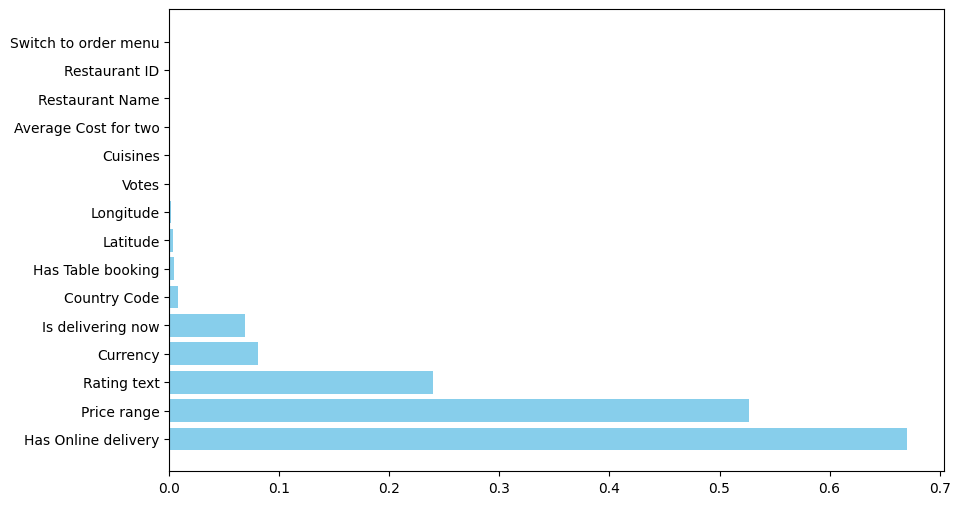

In [36]:
import matplotlib.pyplot as plt

# Assuming feature_importance_linear is already defined
# Sort the coefficients in descending order
sorted_coefficients = feature_importance_linear.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_coefficients.index, sorted_coefficients, color='skyblue')
plt.show()
